## Data Screening

Load and review the data, check that dates are loaded properly and filter data down to the events in La Palma only. The dataset itself contains all recent IGN earthquake data for Spanish territory.

In [1]:
import pandas as pd
from igndata import load
import matplotlib.pyplot as plt

In [2]:
df = load('../data.csv')
df.head()

,Event,Date,UTC time,Local time(*),Latitude,Longitude,Depth(km),Magnitude,Mag. type,Max. int,Region,More Info
0,es2021vzayp,2021-11-09,11:31:20,11:31:20,28.5572,-17.8495,11.0,3.1,mbLg,NaN,N FUENCALIENTE DE LA PALMA.ILP,NaN
1,es2021vzaks,2021-11-09,11:15:13,11:15:13,28.5562,-17.8308,11.0,2.9,mbLg,NaN,NE FUENCALIENTE DE LA PALMA.IL,NaN
2,es2021vyzqz,2021-11-09,10:52:43,10:52:43,28.5574,-17.8558,12.0,2.7,mbLg,NaN,N FUENCALIENTE DE LA PALMA.ILP,NaN
3,es2021vyyhv,2021-11-09,10:11:09,10:11:09,28.4833,-17.9399,17.0,3.4,mbLg,NaN,W FUENCALIENTE DE LA PALMA.ILP,NaN
4,es2021vyxqr,2021-11-09,09:51:12,09:51:12,28.5673,-17.8354,10.0,3.5,mbLg,NaN,SW VILLA DE MAZO.ILP,NaN


In [3]:
df.describe()

,Latitude,Longitude,Depth(km),Magnitude,More Info
count,7164.000000,7164.000000,6783.000000,7164.000000,0.0
mean,30.384526,-14.773867,12.990860,2.575782,NaN
std,3.632865,5.871328,7.511649,0.545653,NaN
min,27.489500,-18.231400,1.000000,1.200000,NaN
25%,28.560100,-17.845300,10.000000,2.200000,NaN
50%,28.566800,-17.834200,11.000000,2.600000,NaN
75%,28.601825,-17.808000,14.000000,2.900000,NaN
max,44.225400,5.509400,95.000000,5.000000,NaN


<Figure size 864x864 with 0 Axes>

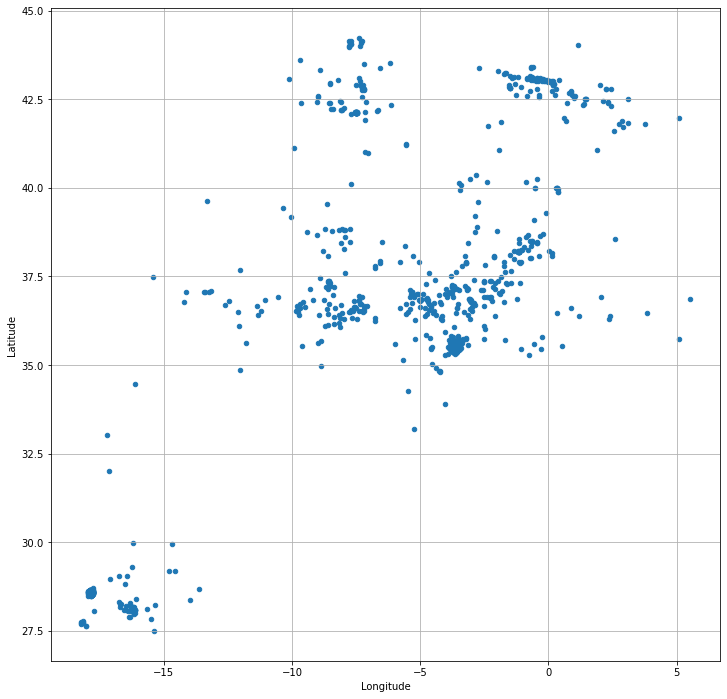

In [4]:
plt.figure(figsize=(12,12))
ax = df.plot.scatter(x="Longitude", y="Latitude", figsize=(12,12), grid="on")

### Filter down to La Palma events only
Also some rows seem to be missing depth measurements, (see differences in the **count** for columns above) - take only rows with valid depths

In [5]:
df = df[(df['Latitude'] < 29) & (df['Latitude'] > 28) & (df['Longitude'] < -17.5)]
df = df[df['Depth(km)'].notna()]
df.describe()

,Latitude,Longitude,Depth(km),Magnitude,More Info
count,5465.000000,5465.000000,5465.000000,5465.000000,0.0
mean,28.566559,-17.842622,12.455627,2.709716,NaN
std,0.015239,0.021682,6.543965,0.503148,NaN
min,28.477500,-17.961000,1.000000,1.500000,NaN
25%,28.558500,-17.849600,10.000000,2.500000,NaN
50%,28.563600,-17.838300,11.000000,2.700000,NaN
75%,28.571200,-17.830600,13.000000,3.000000,NaN
max,28.697000,-17.757000,42.000000,5.000000,NaN


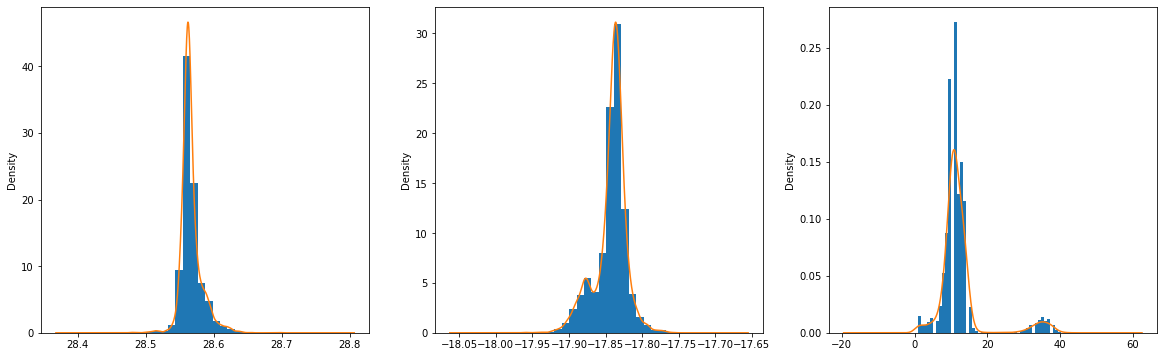

In [14]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
df["Latitude"].plot.hist(bins=20, density=True)
df["Latitude"].plot.kde()
plt.subplot(1,3,2)
df["Longitude"].plot.hist(bins=20, density=True)
df["Longitude"].plot.kde()
plt.subplot(1,3,3)
df["Depth(km)"].plot.hist(bins=50, density=True)
_=df["Depth(km)"].plot.kde()

/Users/stevejpurves/opt/anaconda3/envs/lapalma-earthquakes/lib/python3.9/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


(-18.0, -17.75)

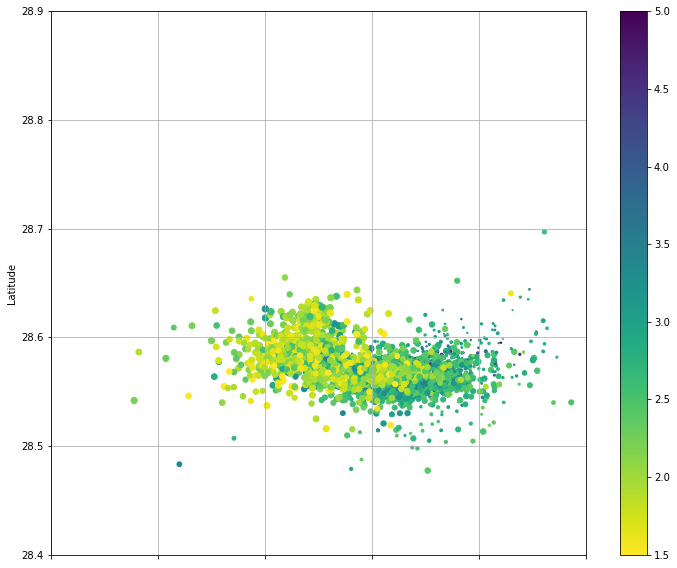

In [13]:
from matplotlib import cm
cmap = cm.get_cmap('viridis_r')
ax = df.plot.scatter(x="Longitude", y="Latitude", s=40-df["Depth(km)"], c=df["Magnitude"], figsize=(12,10), grid="on", cmap=cmap)
ax.set_ylim((28.4, 28.9))
ax.set_xlim((-18, -17.75))

In [18]:
df.to_csv("./lapalma.csv", index=False)